Download the dataframe of records of Facebook posts about Thailand: https://itacademy.barcelonactiva.cat/pluginfile.php/18582/mod_assign/introattachment/0/Publicacions%20Facebook%20Thailandia.csv?forcedownload=1

K-Means model: Unsupervised learning to find clusters in the data, grouping performed according to the similarity of characteristics of the variables.

In [27]:
import pandas as pd
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from kneed import KneeLocator
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [28]:
# Load the dataframe
filename = 'C:/Users/Lucía Alvarez/OneDrive - psico.edu.uy/00 Barcelona activa/DF_facebook.csv'
df = pd.read_csv(filename, sep=",", encoding="utf8") 

df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


# Description of the dataframe

In [29]:
# Descriptive statistics of the entire dataframe
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [31]:
#View which variables have missing values
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [32]:
# The four rows that have missing values are eliminated
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1)

df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [33]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [34]:
# Save the columns to be used in the analysis.
df2 = df.drop(['status_id', 'status_type', 'status_published',], axis=1)
df2

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


In [35]:
#Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

df_scaled = pd.DataFrame(df_scaled, 
             columns=['num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'])

df_scaled[:5]

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748


In [36]:
df_scaled.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03
mean,6.572520e-16,9.976811e-16,-1.043607e-14,-1.290260e-15,9.370952e-15,-2.702897e-15,3.198364e-15,-3.898639e-15,-2.798234e-15
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-4.974511e-01,-2.522062e-01,-3.041444e-01,-4.784685e-01,-3.184544e-01,-1.478790e-01,-1.760099e-01,-1.525870e-01,-1.557480e-01
25%,-4.607017e-01,-2.522062e-01,-3.041444e-01,-4.406437e-01,-3.184544e-01,-1.478790e-01,-1.760099e-01,-1.525870e-01,-1.557480e-01
50%,-3.688282e-01,-2.477097e-01,-3.041444e-01,-3.494192e-01,-3.184544e-01,-1.478790e-01,-1.760099e-01,-1.525870e-01,-1.557480e-01
75%,-2.403230e-02,-2.263511e-01,-2.737471e-01,-6.740185e-02,-2.433983e-01,-1.478790e-01,-1.760099e-01,-1.525870e-01,-1.557480e-01
max,9.684296e+00,2.334336e+01,2.571594e+01,1.000123e+01,1.611883e+01,3.173639e+01,3.950149e+01,3.178144e+01,4.249930e+01


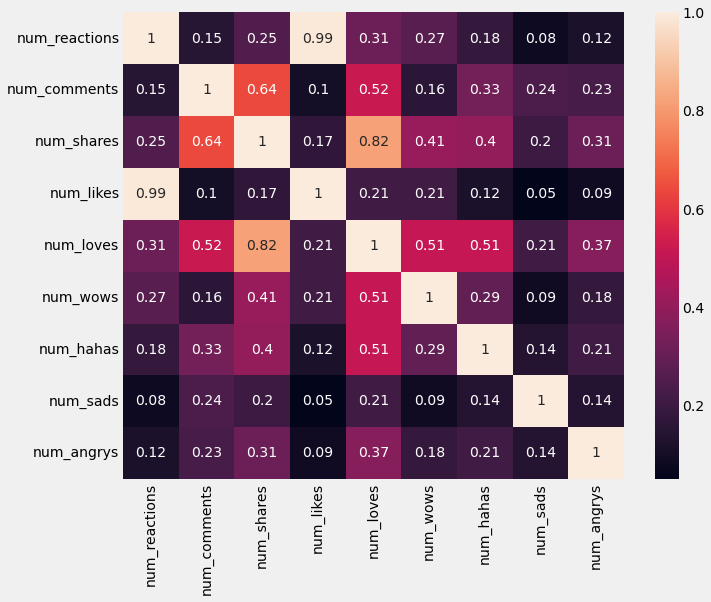

In [37]:
corr_df = df_scaled.corr(method='pearson').round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True)
plt.show()

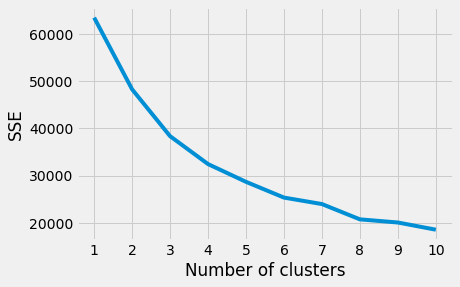

In [38]:
# Elbow curve to explain what would be the optimal value of k

kmeans_kwargs = {"init": "random", 
                 "n_init": 10, 
                 "max_iter": 300, 
                 "random_state": 42, }

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [39]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

By kneed analysis it is suggested to retain 4 clusters. It is important to remember that the selection of the number of clusters is done by the theoretical and analytical evidence we can have from the data. Thus, we estimate three possible models: three clusters, four clusters and five clusters, and then compare the fit indices of the three models.

# K-means with 3 clusters

In [40]:
#Estimating the 3-cluster model
model_3 = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42)

#Fitting the model to the study data:
model_3.fit(df_scaled)
pred = model_3.predict(df_scaled)

#View the count of values in each of the clusters.
frame = pd.DataFrame(df_scaled)
frame['cluster_3'] = pred
frame['cluster_3'].value_counts()[[0,1,2]]

0     372
1     273
2    6405
Name: cluster_3, dtype: int64

In this analysis we have 372 cases belonging to group 1 (index 0), 273 cases belonging to group 2 (index 1) and 6405 belonging to group 3 (index 2).

In [41]:
print("Centroid locations \n" , 
      model_3.cluster_centers_)

Centroid locations 
 [[ 3.44405643 -0.18325934 -0.21564903  3.56552625 -0.24077535  0.13145062
  -0.12573702 -0.13238837 -0.14835034]
 [ 1.20355309  3.3651991   3.55859537  0.87052666  3.41794709  1.81112129
   2.28734426  1.57450635  2.11233342]
 [-0.25132849 -0.13279108 -0.13915302 -0.24418884 -0.13169885 -0.08482994
  -0.0901906  -0.05942104 -0.08141775]]


# K-means with 4 clusters

In [42]:
#Estimating the 4-cluster model
model_4 = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42)

model_4.fit(df_scaled)
pred = model_4.predict(df_scaled)

frame = pd.DataFrame(df_scaled)
frame['cluster_4'] = pred
frame['cluster_4'].value_counts()[[0,1,2,3]]

0     372
1      34
2     372
3    6272
Name: cluster_4, dtype: int64

In this analysis we have 372 points belonging to group 1 (index 0), 34 points belong to group 2, 372 belong to group 3 and 6272 belong to group 4.

In [43]:
print("Centroid locations \n" , 
      model_4.cluster_centers_)

Centroid locations 
 [[ 3.44405643e+00 -1.83259342e-01 -2.15649028e-01  3.56552625e+00
  -2.40775354e-01  1.31450622e-01 -1.25737021e-01 -1.32388372e-01
  -1.48350342e-01  2.66453526e-15]
 [ 2.79403685e+00  1.67961793e+00  5.39736106e+00  1.94369348e+00
   7.14227048e+00  1.15439209e+01  7.16782069e+00  1.70746866e+00
   2.35337266e+00  1.00000000e+00]
 [ 6.81092587e-01  2.86007338e+00  2.68849845e+00  4.64101303e-01
   2.39594054e+00  2.95471987e-01  1.20785190e+00  1.33537832e+00
   1.67148017e+00  1.35752688e+00]
 [-2.59813885e-01 -1.67870190e-01 -1.75926381e-01 -2.49538748e-01
  -1.66543151e-01 -8.78999553e-02 -1.03037729e-01 -8.06068549e-02
  -1.03096136e-01  2.00000000e+00]]


# K-means with 5 clusters

In [44]:
model_5 = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42)

model_5.fit(df_scaled)
pred = model_5.predict(df_scaled)

frame = pd.DataFrame(df_scaled)
frame['cluster_5'] = pred
frame['cluster_5'].value_counts()[[0,1,2,3,4]]

0      17
1     372
2     359
3    6269
4      33
Name: cluster_5, dtype: int64

In this analysis we have 17 cases belonging to group 1, 372 points belong to group 2, 359 belong to group 3, 6269 belong to group 4 and 33 belong to group 5.
En este análisis tenemos 17 casos que pertenecen al grupo 1, 372 puntos pertenecen al grupo 2, 359 pertenecen al grupo 3, 6269 pertenecen al grupo 4 y 33 al grupo 5.

In [45]:
print("Centroid locations \n" , 
      model_5.cluster_centers_)

Centroid locations 
 [[ 3.74361788e-01  2.96966262e-01  8.78913791e-02  2.63107136e-01
   6.08709362e-01  4.05339461e-01  2.40239646e-01  1.56855107e+01
   1.46303952e+00  1.58823529e+00  2.23529412e+00]
 [ 3.44405643e+00 -1.83259342e-01 -2.15649028e-01  3.56552625e+00
  -2.40775354e-01  1.31450622e-01 -1.25737021e-01 -1.32388372e-01
  -1.48350342e-01  2.66453526e-15 -5.32907052e-15]
 [ 6.95366093e-01  2.94673762e+00  2.78770138e+00  4.73151103e-01
   2.47604431e+00  2.97469567e-01  1.24740443e+00  8.10195334e-01
   1.66865710e+00  1.35097493e+00  2.00000000e+00]
 [-2.59736717e-01 -1.67476399e-01 -1.75555910e-01 -2.49467171e-01
  -1.66262930e-01 -8.77797774e-02 -1.02841557e-01 -8.66651828e-02
  -1.02851452e-01  2.00000000e+00  2.99968097e+00]
 [ 2.76060325e+00  1.67135725e+00  5.40916643e+00  1.91514739e+00
   7.04917503e+00  1.17487712e+01  7.26017042e+00  1.06177877e+00
   2.30431850e+00  1.00000000e+00  1.00000000e+00]]


## The distribution of the data when k=3 is analyzed below.

In [46]:
df_cluster_3 = df_scaled.groupby(['cluster_3'])
df_cluster_3.describe()

num_reactions                                                    \
                  count      mean       std       min       25%       50%   
cluster_3                                                                   
0                 372.0  3.444056  1.414608  1.595103  2.233895  3.440140   
1                 273.0  1.203553  1.185500 -0.231558  0.235375  0.605031   
2                6405.0 -0.251328  0.333624 -0.497451 -0.465025 -0.398012   

                              num_comments            ... cluster_4       \
                75%       max        count      mean  ...       75%  max   
cluster_3                                             ...                  
0          4.283755  9.684296        372.0 -0.183259  ...       0.0  0.0   
1          2.139859  5.207354        273.0  3.365199  ...       2.0  2.0   
2         -0.145089  1.649147       6405.0 -0.132791  ...       3.0  3.0   

          cluster_5                                               
              count      mean       std  min  25%  50%  75%  max  
cluster_3                                                         
0             372.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
1             273.0  2.190476  0.742846  0.0  2.0  2.0  2.0  4.0  
2            6405.0  2.975644  0.182032  0.0  3.0  3.0  3.0  3.0  

[3 rows x 88 columns]

## The distribution of the data when k=4 is analyzed below.


In [47]:
df_cluster_4 = df_scaled.groupby(['cluster_4'])
df_cluster_4.describe()

num_reactions                                                    \
                  count      mean       std       min       25%       50%   
cluster_4                                                                   
0                 372.0  3.444056  1.414608  1.595103  2.233895  3.440140   
1                  34.0  2.794037  1.036123  0.347785  2.332253  2.652189   
2                 372.0  0.681093  0.929439 -0.395850  0.079190  0.277529   
3                6272.0 -0.259814  0.328765 -0.497451 -0.465025 -0.402335   

                              num_comments            ... cluster_3       \
                75%       max        count      mean  ...       75%  max   
cluster_4                                             ...                  
0          4.283755  9.684296        372.0 -0.183259  ...       0.0  0.0   
1          3.293683  5.207354         34.0  1.679618  ...       1.0  1.0   
2          0.869843  4.199988        372.0  2.860073  ...       2.0  2.0   
3         -0.166166  1.584295       6272.0 -0.167870  ...       2.0  2.0   

          cluster_5                                               
              count      mean       std  min  25%  50%  75%  max  
cluster_4                                                         
0             372.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
1              34.0  3.882353  0.685994  0.0  4.0  4.0  4.0  4.0  
2             372.0  1.946237  0.347981  0.0  2.0  2.0  2.0  3.0  
3            6272.0  2.997608  0.084677  0.0  3.0  3.0  3.0  3.0  

[4 rows x 88 columns]

## The distribution of the data when k=5 is analyzed below.


In [48]:
df_cluster_5 = df_scaled.groupby(['cluster_5'])
df_cluster_5.describe()

num_reactions                                                    \
                  count      mean       std       min       25%       50%   
cluster_5                                                                   
0                  17.0  0.374362  0.980012 -0.378556 -0.086722  0.161876   
1                 372.0  3.444056  1.414608  1.595103  2.233895  3.440140   
2                 359.0  0.695366  0.940754 -0.395850  0.079731  0.289419   
3                6269.0 -0.259737  0.328971 -0.497451 -0.465025 -0.402335   
4                  33.0  2.760603  1.033395  0.347785  2.332253  2.552750   

                              num_comments            ... cluster_3       \
                75%       max        count      mean  ...       75%  max   
cluster_5                                             ...                  
0          0.228890  3.897346         17.0  0.296966  ...       2.0  2.0   
1          4.283755  9.684296        372.0 -0.183259  ...       0.0  0.0   
2          0.949827  4.199988        359.0  2.946738  ...       2.0  2.0   
3         -0.166706  1.584295       6269.0 -0.167476  ...       2.0  2.0   
4          3.266120  5.207354         33.0  1.671357  ...       1.0  1.0   

          cluster_4                                               
              count      mean       std  min  25%  50%  75%  max  
cluster_5                                                         
0              17.0  2.235294  0.562296  1.0  2.0  2.0  3.0  3.0  
1             372.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
2             359.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0  
3            6269.0  2.999681  0.017860  2.0  3.0  3.0  3.0  3.0  
4              33.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  

[5 rows x 88 columns]

# Classification using the hierarchical clustering algorithm.

In [49]:
df_scaled.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_3,cluster_4,cluster_5
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,2,3,3
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,2,3,3
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,2,3,3
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,2,3,3
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,2,3,3


In [50]:
df_scaled = df_scaled.drop(['cluster_3','cluster_4', 'cluster_5'], axis=1)

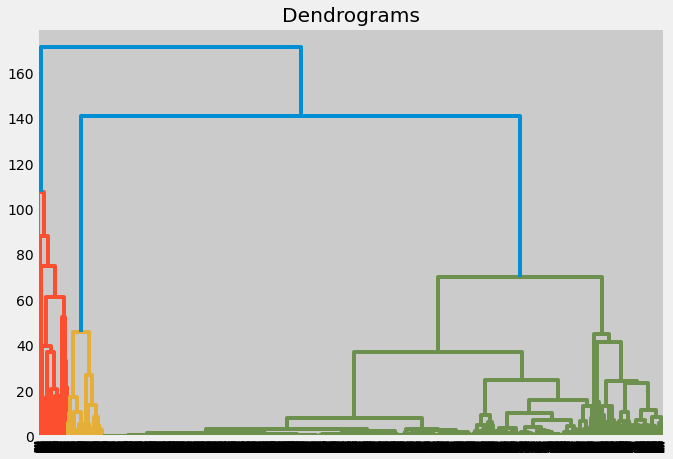

In [51]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))


A cut is made in the dendogram:

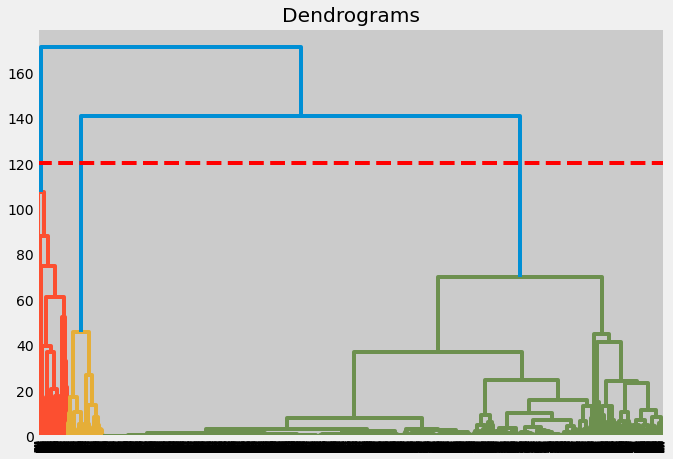

In [52]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=120, color='r', linestyle='--')

We have three clusters, since this line cuts the dendrogram at three points. Now let's apply hierarchical clustering for 3 clusters:

In [53]:
clustering_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_model.fit(df_scaled)
clustering_model.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Text(0.5, 1.0, 'Gráfico')

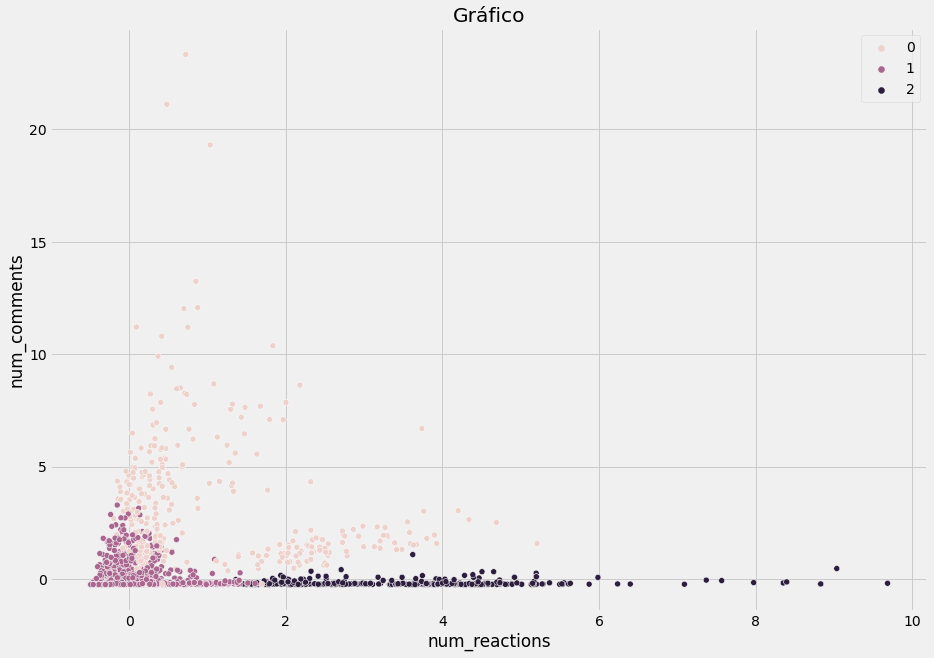

In [54]:
data_labels = clustering_model.labels_
plt.figure(figsize=(14,10))
sns.scatterplot(x='num_reactions', 
                y='num_comments', 
                data=df_scaled, 
                hue=data_labels).set_title('Gráfico')

The above graph shows the data grouped in 3 clusters, each group is identified with a different color.
When observing this graph it can be seen that:
- The group labeled 0 (with light pink color) are the ones with higher dispersion in relation to the rest of the clusters. This group is characterized by having a high number of comments and a high number of reactions on Facebook.

- The group with label 1 (with light purple color) are the ones that report low number of comments and moderate number of reactions.

- Finally, the group with label 3 (with dark violet color) are those who report low number of comments and low number of reactions.

In sum, it is observed that the 3 clusters obtained report differences in their behavior.

Evaluation of clustering performance

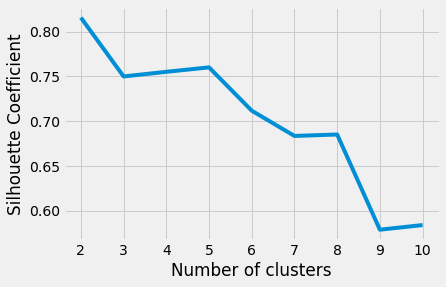

In [55]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


In [56]:
print("Inertia Criterion of 3-clusters: ",model_3.inertia_)
print("Inertia Criterion of 4-clusterss: ",model_4.inertia_)
print("Inertia Criterion of 5-clusters: ",model_5.inertia_)

Inertia Criterion of 3-clusters:  38372.997723869616
Inertia Criterion of 4-clusterss:  32556.44837794533
Inertia Criterion of 5-clusters:  28740.429246176474


In sum, this study shows:

    - According to the silhouette coefficient, the model with the best fit is the 5-cluster model.
    
    - Considering the hierarchical clustering, the best model is the 3-cluster model.
   
It would be necessary to continue investigating the differences between them to be able to make further inferences.

## Recommended web pages

https://medium.com/@slsarath2/k-means-clustering-algorithm-5fa9d5d64326

https://www.cienciadedatos.net/documentos/py20-clustering-con-python.html

https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

https://dcain.etsin.upm.es/~carlos/bookAA/03.1_Clustering-K-Means.html

https://www.kaggle.com/code/benai9916/k-means-clustering-in-python